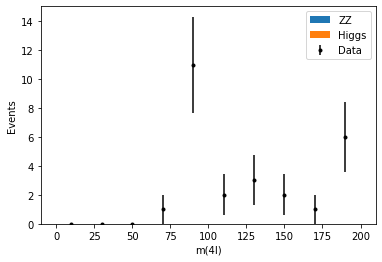

In [13]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt

'''
In diesen Listen werden die Messwerte gespeichert.
Alle Werte in diesen Listen landen am Ende des Programms im Histogramm
'''
ValuesHiggs = []
ValuesZZ = []
WeightsHiggs = []
WeightsZZ = []
ValuesData = []

'''
Nun lesen wir die Daten ein. Zuerst die gemessenen Daten des CMS Detektors.
'''
Datafiles = ['DATA_Elektron_2011.csv', 'DATA_Myon_2011.csv']
# Datafiles = ['DATA_Elektron_2011.csv', 'DATA_Elektron_2012.csv', 'DATA_Myon_2011.csv', 'DATA_Myon_2012.csv']
for filename in Datafiles:
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if not row[0]:
                continue
            lepton1 = np.array([ float(row[0]),float(row[1]),float(row[2]),float(row[3]) ])
            lepton2 = np.array([ float(row[4]),float(row[5]),float(row[6]),float(row[7]) ])
            lepton3 = np.array([ float(row[8]),float(row[9]),float(row[10]),float(row[11]) ])
            lepton4 = np.array([ float(row[12]),float(row[13]),float(row[14]),float(row[15]) ])
            LeptonSum = lepton1 + lepton2 + lepton3 + lepton4
            Mass2 = - LeptonSum[0]*LeptonSum[0] - LeptonSum[1]*LeptonSum[1] - LeptonSum[2]*LeptonSum[2] + LeptonSum[3]*LeptonSum[3]
            if Mass2 < 0: 
                continue
            Mass = math.sqrt(Mass2)
            ValuesData.append( Mass )
          
'''
Nun simulierte Higgs Ereignisse.
'''     
Higgsfiles = []
# Higgsfiles = ['MC_Higgs_2011.csv']
# Higgsfiles = ['MC_Higgs_2012.csv', 'MC_Higgs_2011.csv']
for filename in Higgsfiles:
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if not row[0]:
                continue
            lepton1 = np.array([ float(row[0]),float(row[1]),float(row[2]),float(row[3]) ])
            lepton2 = np.array([ float(row[4]),float(row[5]),float(row[6]),float(row[7]) ])
            lepton3 = np.array([ float(row[8]),float(row[9]),float(row[10]),float(row[11]) ])
            lepton4 = np.array([ float(row[12]),float(row[13]),float(row[14]),float(row[15]) ])
            LeptonSum = lepton1 + lepton2 + lepton3 + lepton4
            Mass2 = - LeptonSum[0]*LeptonSum[0] - LeptonSum[1]*LeptonSum[1] - LeptonSum[2]*LeptonSum[2] + LeptonSum[3]*LeptonSum[3]
            if Mass2 < 0: 
                continue
            Mass = math.sqrt(Mass2)
            ValuesHiggs.append( Mass )
            WeightsHiggs.append( float(row[16]) )
        

'''
Nun simulierte ZZ Ereignisse.
'''  
ZZfiles = []
# ZZfiles = ['MC_ZZ_2el2mu_2011.csv', 'MC_ZZ_4el_2011.csv', 'MC_ZZ_4mu_2011.csv']
# ZZfiles = ['MC_ZZ_2el2mu_2012.csv', 'MC_ZZ_4el_2012.csv', 'MC_ZZ_4mu_2012.csv', 'MC_ZZ_2el2mu_2011.csv', 'MC_ZZ_4el_2011.csv', 'MC_ZZ_4mu_2011.csv']
for filename in ZZfiles:
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if not row[0]:
                continue
            lepton1 = np.array([ float(row[0]),float(row[1]),float(row[2]),float(row[3]) ])
            lepton2 = np.array([ float(row[4]),float(row[5]),float(row[6]),float(row[7]) ])
            lepton3 = np.array([ float(row[8]),float(row[9]),float(row[10]),float(row[11]) ])
            lepton4 = np.array([ float(row[12]),float(row[13]),float(row[14]),float(row[15]) ])
            LeptonSum = lepton1 + lepton2 + lepton3 + lepton4
            Mass2 = - LeptonSum[0]*LeptonSum[0] - LeptonSum[1]*LeptonSum[1] - LeptonSum[2]*LeptonSum[2] + LeptonSum[3]*LeptonSum[3]
            if Mass2 < 0: 
                continue
            Mass = math.sqrt(Mass2)
            ValuesZZ.append( Mass )
            WeightsZZ.append( float(row[16]) )
       
'''
Hier wird das Histogramm erstellt, angepasst und gezeichnet.
'''  
nbins = 10
min = 0
max = 200
fig = plt.figure()
fig.subplots_adjust()
ax1 = fig.add_subplot()
ax1.set_ylabel('Events')
ax1.set_xlabel('m(4l)')
Labels = [ "ZZ", "Higgs" ]
plt.hist( [ ValuesZZ, ValuesHiggs ], weights = [ WeightsZZ, WeightsHiggs ] , bins=nbins, range=(min,max), label=Labels, stacked=True )
datahist,bins = np.histogram(ValuesData, bins=nbins, range=(min,max))
binsize = (max-min)/nbins
real_bins = [x+binsize/2 for x in bins]
del real_bins[-1] 
dataerr = [math.sqrt(x) for x in datahist]
plt.errorbar( real_bins, datahist, yerr=dataerr, xerr=None, marker=".", label="Data", fmt='o', color="black" ) 
plt.legend(loc="upper right")
plt.show()
